In [2]:
using DiffEqFlux,OrdinaryDiffEq,Flux,Optim,Plots,DifferentialEquations,CSV,DataFrames,ForwardDiff

In [3]:
using ForwardDiff

In [4]:
begin
    data=CSV.read("w2021.csv",DataFrame,header=6)
    dataset=Array(transpose(Matrix(data[1:365,[8,5]])))
    dataset0=Matrix(data[1:365,[8,5]])
    end

365×2 Matrix{Float64}:
 -1.3  10.5
  0.1  10.8
 -0.4   8.4
  1.3  11.4
  2.5  10.0
  3.9   6.8
  2.0  12.7
 -1.5   6.5
 -1.5   8.4
 -2.4   8.1
 -1.3   6.5
  1.2   5.7
 -0.5  12.5
  ⋮    
  0.8  11.9
  2.0  15.2
  5.0  13.5
  5.0  13.2
  3.6  13.2
  4.7  14.1
 -0.2   7.6
 -2.2   8.1
 -1.6   9.5
  0.9   8.9
  0.6  14.5
  0.1   6.0

In [5]:
data

,Column1,Column2,�i�����,�ώ��ԍ�,Column5
,String15,Float64,Int64,Int64,Float64
1,2021/1/1,4.4,8,1,10.5
2,2021/1/2,4.8,8,1,10.8
3,2021/1/3,3.7,8,1,8.4
4,2021/1/4,5.8,8,1,11.4
5,2021/1/5,6.0,8,1,10.0
6,2021/1/6,5.3,8,1,6.8
7,2021/1/7,6.3,8,1,12.7
8,2021/1/8,2.4,8,1,6.5
9,2021/1/9,2.9,8,1,8.4


In [6]:
using LinearAlgebra

In [7]:
sum(data[1:end,5].*data[1:end,8])/(norm(data[1:end,5])*norm(data[1:end,8]))

0.9647876893426736

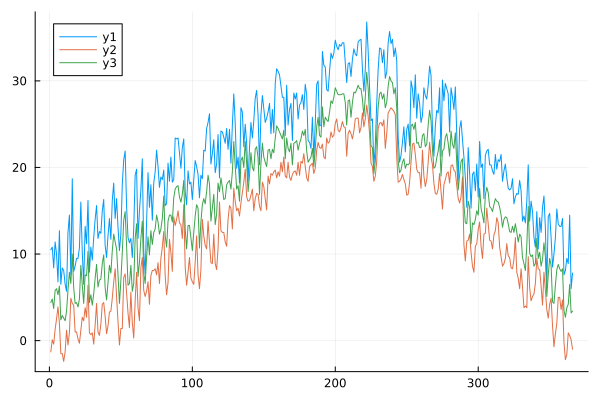

In [8]:
plot(data[1:end,5])
plot!(data[1:end,8])
plot!(data[1:end,2])

In [ ]:
dataset[:,2]

2-element Vector{Float64}:
  0.1
 10.8

In [9]:
function tts(du,u,p,t)
    ta,ts=u
    ca,cs,si,e,a,q=p
    du[1]=dta=(1/ca )*(si*ts^4 - 2*si*e*ta^4)
    du[2]=dts=(1/cs )*(si*e*ta^4 - si*ts^4)+(1-a)*q
end


tts (generic function with 1 method)

In [29]:
function loss(p)
    tmp_prob =remake(prob,p=p)
    tmp_sol=solve(tmp_prob,saveat=1)
    return sum(abs2,Array(tmp_sol)[:,2:end]-dataset[:,2:end])
end

loss (generic function with 1 method)

In [11]:
u0=[-1.3,10.5]
tspan=(0,364)
p=rand(6)
prob=ODEProblem(tts,u0,tspan,p)
sol=solve(ODEProblem(tts,u0,tspan,p),saveat=1)

retcode: Success
Interpolation: 1st order linear
t: 365-element Vector{Float64}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
  11.0
  12.0
   ⋮
 353.0
 354.0
 355.0
 356.0
 357.0
 358.0
 359.0
 360.0
 361.0
 362.0
 363.0
 364.0
u: 365-element Vector{Vector{Float64}}:
 [-1.3, 10.5]
 [1.6583042462333433, 1.0489137099789057]
 [1.378793922282771, 0.8725527313242275]
 [1.2653747129412172, 0.801091945018894]
 [1.207312851573079, 0.7645475254053927]
 [1.1747239652458081, 0.7440515010876471]
 [1.1555662389171208, 0.73200819135782]
 [1.1440253877203521, 0.7247553753133738]
 [1.1369741877546424, 0.7203251374278106]
 [1.1325116004275821, 0.7175216651979694]
 [1.1298442732587215, 0.7158459921699803]
 [1.1281036720811997, 0.7147526846380593]
 [1.1271049919744123, 0.7141253506213407]
 ⋮
 [1.1254090855050347, 0.7130601284367623]
 [1.1254090857320433, 0.7130601285793498]
 [1.125409085964238, 0.7130601287251946]
 [1.1254090862016184, 0.7130601288742968]
 [1.125409086444

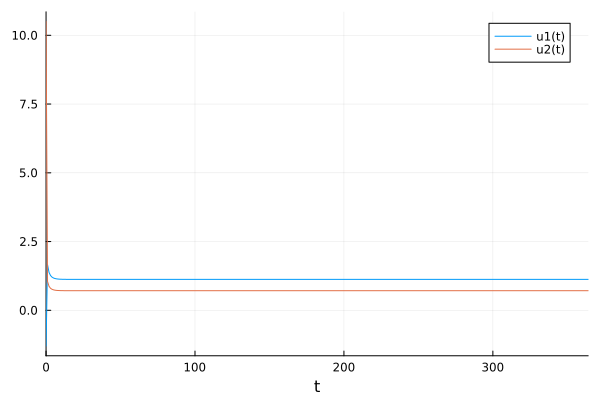

In [12]:
plot(sol)

In [42]:
res=DiffEqFlux.sciml_train(loss,p,Adam(0.05),maxiters=2)

┌ Warning: sciml_train is being deprecated in favor of direct usage of Optimization.jl. Please consult the Optimization.jl documentation for more details. Optimization.jl's PolyOpt solver is the polyalgorithm of sciml_train
└ @ DiffEqFlux /Users/aaaa/.julia/packages/DiffEqFlux/2IJEZ/src/train.jl:6


u: 6-element Vector{Float64}:
 0.05615764303427515
 0.6062602066993942
 0.3075550987619636
 0.030581054961888954
 0.7605230200006523
 0.48851368410954465

In [43]:
sol1=solve(ODEProblem(tts,u0,tspan,res),saveat=1)

retcode: Success
Interpolation: 1st order linear
t: 365-element Vector{Float64}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
  11.0
  12.0
   ⋮
 353.0
 354.0
 355.0
 356.0
 357.0
 358.0
 359.0
 360.0
 361.0
 362.0
 363.0
 364.0
u: 365-element Vector{Vector{Float64}}:
 [-1.3, 10.5]
 [2.3978956132402582, 1.1733956108753139]
 [1.9981298876170905, 0.982821072976284]
 [1.8388388821756134, 0.9079959926478971]
 [1.7595858564481992, 0.8711024078790545]
 [1.716296428916345, 0.8510995406170587]
 [1.6914888228061695, 0.8397955850745764]
 [1.6773244549418334, 0.8332999369409777]
 [1.669022846249412, 0.8295141508180705]
 [1.664009858867325, 0.8272292658224903]
 [1.661211445073697, 0.8259532190788574]
 [1.6594403920103316, 0.8251464803352433]
 [1.6585116075240747, 0.824723801071437]
 ⋮
 [1.6571279587277006, 0.8240938238824768]
 [1.657127958462321, 0.8240938237616593]
 [1.65712795819286, 0.8240938236389838]
 [1.6571279579193177, 0.82409382351445]
 [1.6571279576416937,

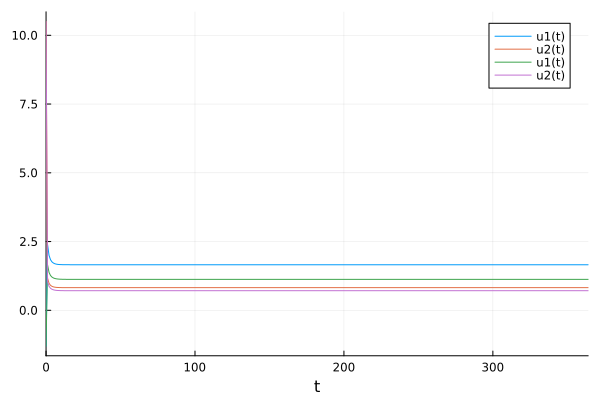

In [45]:
plot(sol1)
plot!(sol)

In [ ]:
dudt2 = Chain(x -> x,
                    Dense(2, 50, ),
                    Dense(50, 2))
end


In [68]:
dudt2=FastChain((x,p)-> x.^3,
      FastDense(2,50,tanh),
      FastDense(50,10,tanh),
      FastDense(10,2))

neural_ode(u,p,t)=dudt2(u,p)
p=initial_params(dudt2)
prob=ODEProblem(neural_ode,u0,tspan,p)
sol=solve(ODEProblem(neural_ode,u0,tspan,p),saveat=1)

┌ Warning: FastChain is being deprecated in favor of Lux.jl. Lux.jl uses functions with explicit parameters f(u,p) like FastChain, but is fully featured and documented machine learning library. See the Lux.jl documentation for more details.
└ @ DiffEqFlux /Users/aaaa/.julia/packages/DiffEqFlux/2IJEZ/src/fast_layers.jl:9


retcode: Success
Interpolation: 1st order linear
t: 365-element Vector{Float64}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
  11.0
  12.0
   ⋮
 353.0
 354.0
 355.0
 356.0
 357.0
 358.0
 359.0
 360.0
 361.0
 362.0
 363.0
 364.0
u: 365-element Vector{Vector{Float64}}:
 [-1.3, 10.5]
 [-2.2159334434027222, 11.247315211618696]
 [-3.1137930092707613, 12.031934505669854]
 [-4.016596490400097, 12.806341210036859]
 [-5.007070754263372, 13.399765680533495]
 [-6.090362668097849, 13.801550978364801]
 [-7.196129497535883, 14.156850194337675]
 [-8.29556406845229, 14.525192559586804]
 [-9.426220552113566, 14.903264557830235]
 [-10.46295049998843, 15.252752067460493]
 [-10.919349138913935, 15.422775938660598]
 [-11.286063851352424, 15.565049792573879]
 [-11.649684990284785, 15.745280307991315]
 ⋮
 [-1.583280768460239, 1.153310308414949]
 [-1.5832361064087779, 1.1530797843546865]
 [-1.5829354698811058, 1.1527257101303097]
 [-1.583186661118347, 1.152983178587728]
 [-1.5

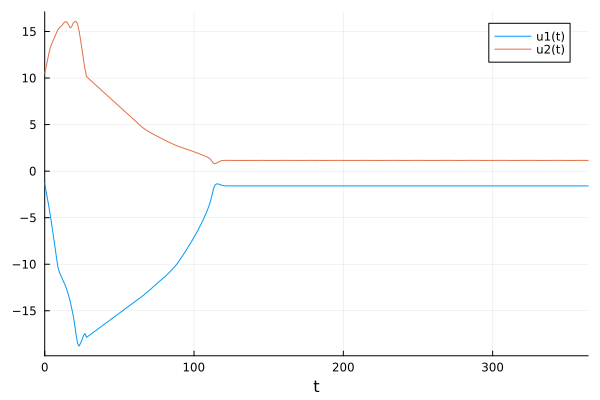

In [69]:
plot(sol)

In [70]:
res=DiffEqFlux.sciml_train(loss,p,Adam(0.05),maxiters=100)


┌ Warning: sciml_train is being deprecated in favor of direct usage of Optimization.jl. Please consult the Optimization.jl documentation for more details. Optimization.jl's PolyOpt solver is the polyalgorithm of sciml_train
└ @ DiffEqFlux /Users/aaaa/.julia/packages/DiffEqFlux/2IJEZ/src/train.jl:6


u: 682-element Vector{Float32}:
 -0.17143337
  0.6124951
  0.13866156
 -0.10349946
  0.27810466
 -0.011786044
  0.28588125
 -0.22769585
 -0.38248634
  0.40236568
  0.30434954
  0.11550753
 -0.52364683
  ⋮
 -0.2064205
  0.5657708
 -0.57106787
  0.32647046
  0.23744476
 -0.5249263
  0.75049984
 -0.29197964
 -0.28258383
  0.43772087
 -0.12447181
 -0.22695175

In [71]:
sol1=solve(ODEProblem(neural_ode,u0,tspan,res),saveat=1)

retcode: Success
Interpolation: 1st order linear
t: 365-element Vector{Float64}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
  11.0
  12.0
   ⋮
 353.0
 354.0
 355.0
 356.0
 357.0
 358.0
 359.0
 360.0
 361.0
 362.0
 363.0
 364.0
u: 365-element Vector{Vector{Float64}}:
 [-1.3, 10.5]
 [0.7168991787332651, 8.029198041678363]
 [2.681757519911442, 5.646170303365942]
 [3.9227841399249614, 5.218081007204092]
 [3.825411522588693, 5.06323929620647]
 [3.716988771829872, 4.925522369545521]
 [3.626166555385061, 4.809169454489962]
 [3.5455802510865095, 4.704201034556807]
 [3.4673591598436047, 4.613836209324266]
 [3.4117139021425626, 4.533623533008807]
 [3.356506984782386, 4.461822911490668]
 [3.3081281948073706, 4.400489759620873]
 [3.266840429368678, 4.349738217980305]
 ⋮
 [2.970816125679878, 3.968223193255441]
 [2.9706739002563207, 3.9669262427832512]
 [2.972653408928998, 3.9668742494582068]
 [2.9706053935642047, 3.968262861749502]
 [2.9693986885564905, 3.967257996

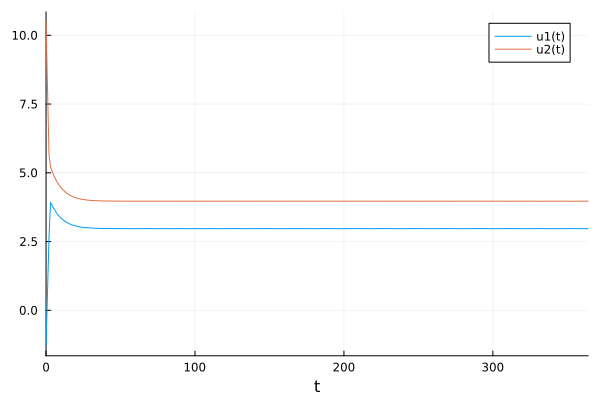

In [72]:
plot(sol1)

#2

In [73]:
u0=[-1.3,10.5]
du0=[-1.1,2.9]
tspan=(0,364)
#model = FastChain(FastDense(2, 50, tanh), FastDense(50, 2))
model=FastChain((x,p)-> x,
FastDense(2,50,tanh),
FastDense(50,10,tanh),
FastDense(10,2))

p = initial_params(model)
ff(du,u,p,t) = model(u,p)
prob = SecondOrderODEProblem{false}(ff, du0, u0, tspan, p)

┌ Warning: FastChain is being deprecated in favor of Lux.jl. Lux.jl uses functions with explicit parameters f(u,p) like FastChain, but is fully featured and documented machine learning library. See the Lux.jl documentation for more details.
└ @ DiffEqFlux /Users/aaaa/.julia/packages/DiffEqFlux/2IJEZ/src/fast_layers.jl:9


ODEProblem with uType ArrayPartition{Float64, Tuple{Vector{Float64}, Vector{Float64}}} and tType Int64. In-place: false
timespan: (0, 364)
u0: ([-1.1, 2.9], [-1.3, 10.5])

In [74]:
sol=solve(prob,p=p,saveat=1)

retcode: Success
Interpolation: 1st order linear
t: 365-element Vector{Float64}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
  11.0
  12.0
   ⋮
 353.0
 354.0
 355.0
 356.0
 357.0
 358.0
 359.0
 360.0
 361.0
 362.0
 363.0
 364.0
u: 365-element Vector{ArrayPartition{Float64, Tuple{Vector{Float64}, Vector{Float64}}}}:
 ([-1.1, 2.9], [-1.3, 10.5])
 ([-0.30540932214471617, 2.4444723590120545], [-1.9987844215186545, 13.172281196157549])
 ([0.4498662429921084, 2.0120009735103985], [-1.923619963796148, 15.396667095364691])
 ([1.1719190554895644, 1.6447763047077513], [-1.1102619088218257, 17.218213826929198])
 ([1.8766353265205047, 1.3710470829742347], [0.4141088642542472, 18.717472903651146])
 ([2.604109385664094, 1.2082778400158127], [2.650616427949145, 19.997549721605445])
 ([3.388131959688431, 1.1395156832984652], [5.641885633234491, 21.166653228789016])
 ([4.229703007256463, 1.0638737694792268], [9.445059559167102, 22.272976491378085])
 ([5.1810967828559855

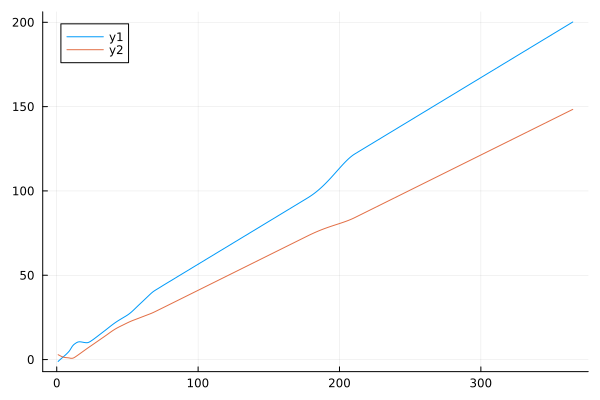

In [75]:
plot(transpose(sol[1:2,:]))



In [76]:
function loss_n_ode(p)
    pred = Array(solve(prob,p=p,saveat=1))
    sum(abs2, dataset .- pred[3:4, :]), pred
end

loss_n_ode (generic function with 1 method)

In [77]:
dataset1=Array(transpose(dataset0[2:end,1:2] .-dataset0[1:364,1:2]))

2×364 Matrix{Float64}:
 1.4  -0.5  1.7   1.2   1.4  -1.9  -3.5  …  -4.9  -2.0  0.6   2.5  -0.3  -0.5
 0.3  -2.4  3.0  -1.4  -3.2   5.9  -6.2     -6.5   0.5  1.4  -0.6   5.6  -8.5

In [78]:
function loss_n_ode1(p)
    pred = Array(solve(prob,p=p,saveat=1))
    sum(abs2, dataset1 .-pred[1:2, 2:end]), pred
end

loss_n_ode1 (generic function with 1 method)

In [79]:
res = DiffEqFlux.sciml_train(loss_n_ode, p, Adam(0.1), maxiters = 100)

┌ Warning: sciml_train is being deprecated in favor of direct usage of Optimization.jl. Please consult the Optimization.jl documentation for more details. Optimization.jl's PolyOpt solver is the polyalgorithm of sciml_train
└ @ DiffEqFlux /Users/aaaa/.julia/packages/DiffEqFlux/2IJEZ/src/train.jl:6


u: 682-element Vector{Float32}:
 -0.40322578
 -0.8904316
  0.13070102
 -0.27395254
 -0.47262746
 -0.9939181
  0.78447807
  0.5578661
 -0.32413247
  0.0952792
 -0.11597141
 -1.0038211
 -0.06741824
  ⋮
  0.51597065
 -0.09488766
  0.29968736
 -0.4240611
  0.42014298
  0.1528843
 -0.9492697
 -0.19656488
  0.32878476
 -0.18124428
  0.1558963
 -0.28840268

In [80]:
sol1=solve(prob,p=res,saveat=1)

retcode: Success
Interpolation: 1st order linear
t: 365-element Vector{Float64}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
  11.0
  12.0
   ⋮
 353.0
 354.0
 355.0
 356.0
 357.0
 358.0
 359.0
 360.0
 361.0
 362.0
 363.0
 364.0
u: 365-element Vector{ArrayPartition{Float64, Tuple{Vector{Float64}, Vector{Float64}}}}:
 ([-1.1, 2.9], [-1.3, 10.5])
 ([1.2053321784704094, 1.5990541022355296], [-1.247314834731177, 12.74953246586427])
 ([3.4800460679373884, 0.29180779116152034], [1.103831612016363, 13.696694991994228])
 ([4.430882959159376, -1.0673472951428327], [5.337484374348214, 13.301965671233326])
 ([4.768240513233387, -2.017926098605824], [9.7945226643407, 11.713216476852843])
 ([4.322608373659291, -3.0776140921653807], [14.371207509619905, 9.241496011981814])
 ([2.5607432440178797, -4.520335473087439], [17.952001698928225, 5.380420479377289])
 ([-0.11487536584661895, -5.273297445528022], [19.31972654243897, 0.4583193657346941])
 ([-3.0326463845848695, -5

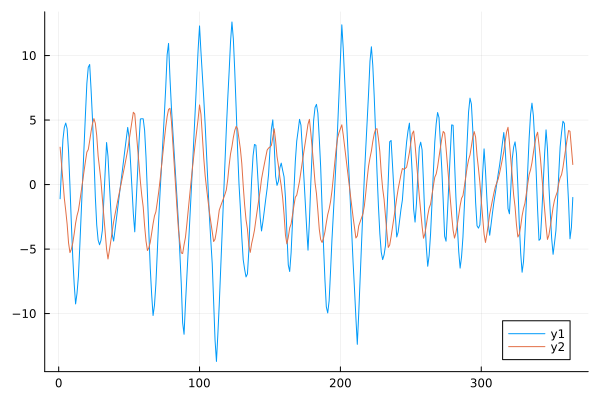

In [84]:
plot(transpose(sol1[1:2,:]))

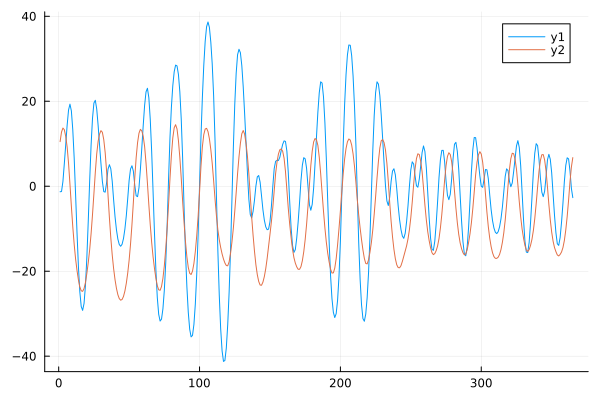

In [83]:
plot(transpose(sol1[3:4,:]))
#plot!(dataset0)

In [203]:
res = DiffEqFlux.sciml_train(loss_n_ode, res, Adam(0.1), maxiters = 100)

┌ Warning: sciml_train is being deprecated in favor of direct usage of Optimization.jl. Please consult the Optimization.jl documentation for more details. Optimization.jl's PolyOpt solver is the polyalgorithm of sciml_train
└ @ DiffEqFlux /Users/aaaa/.julia/packages/DiffEqFlux/2IJEZ/src/train.jl:6


u: 682-element Vector{Float32}:
 -0.051573362
 -0.6027798
  0.7486214
  0.7421825
  0.9554055
 -0.9556364
  0.67172325
  0.20031293
 -0.80209327
 -0.43128547
  ⋮
 -0.30710974
  0.59566635
  0.7814785
 -0.19794236
 -1.6011603
 -0.31310242
 -0.7091729
 -0.1017534
  0.036288615

In [204]:
sol1=solve(prob,p=res,saveat=1)

retcode: Success
Interpolation: 1st order linear
t: 365-element Vector{Float64}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
   ⋮
 356.0
 357.0
 358.0
 359.0
 360.0
 361.0
 362.0
 363.0
 364.0
u: 365-element Vector{ArrayPartition{Float64, Tuple{Vector{Float64}, Vector{Float64}}}}:
 ([-1.1, 2.9], [-1.3, 10.5])
 ([-1.552653872201096, 0.4954497597008256], [-3.064798073083539, 10.94659013858426])
 ([0.17700556468176792, 5.280764556449518], [-3.749640665187484, 13.836741122358145])
 ([0.26713651405904665, 4.361655676962048], [-3.171211120849935, 19.691656829727656])
 ([-1.5590546643183782, -1.9965162094170292], [-3.9086453910817833, 20.608125772087796])
 ([-0.4232423055518334, 0.13953414193973535], [-5.0735538920143055, 19.04683566934059])
 ([1.1546472716988092, 3.912321915071428], [-4.6717787012146275, 21.31327037170498])
 ([0.060396684331976536, -0.4438163847111469], [-3.8114762577611816, 23.715164721758835])
 ([-0.9576473136896118, -4.607092027561831], [-4.53131

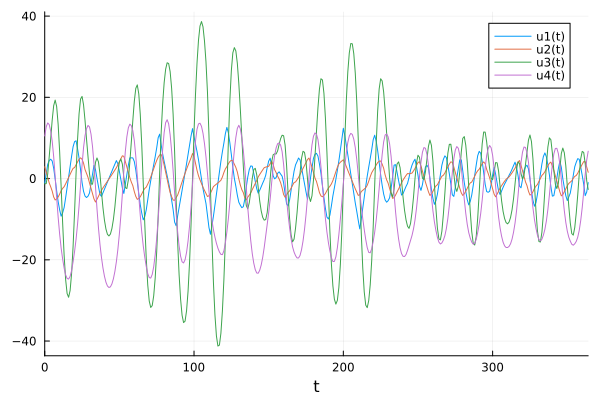

In [82]:
plot(sol1)